**Vendas em Organização de *Retail* - Distribuição Binomial**

Mestrado Profissional em Computação Aplicada - Universidade de Brasília

**Disciplina**: Análise Estatística de Dados e Informações

**Aluno**: Bruno Gomes Resende

Imagine que como cientista de dados de uma grande corporação de *Retail* a gestão pediu para que você ajudasse na melhora do **ROI** (Retorno sobre o Investimento), onde os empregados dessa firma tem por objetivo conseguir realizar novas vendas de produtos por meio de oferta ativa.

Os dados básicos são:

- Em média um vendedor típico realiza 30 ofertas de produtos ou cestas de produtos por dia.
- A probabilidade de sucesso de cada oferta é de 7\%, ou seja, a cada 100 ofertas novas 7 vendas são convertidas.
- A receita média de cada conversão é de R\$ 282,00 por venda de sucesso.
- A firma de *Retail* possui 12000 empregados.
- Cada empregado recebe em média R\$ 115,00 por dia de trabalho.
- O valor médio de encargos trabalhistas por empregado é de R\$ 115,00 por dia de trabalho.

Essa é uma binomial $Binon \sim (n, p)$.

#### Bibliotecas 

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

#### Parâmetros do problema

In [2]:
# Simulação Retail
# Número de empregados
employees = 12000
# Custo por empregado
wage = 230
# Número independente de chamadas por empregado 
n = 30
# Probabilidade de sucesso de cada oferta
p = 0.07
# Receita por venda
revenue = 282
# variável aleatória binomial do problema
conversions = np.random.binomial(n, p, size=employees)

print('Conversão média por empregado: ' + str(round(np.mean(conversions), 2)))
print('Desvio-padrão da conversão por empregado: ' + str(round(np.std(conversions), 2)))
print('Total de conversões: ' + str(np.sum(conversions)))
print('Total de receitas: ' + str(np.sum(conversions)*revenue))
print('Custo Total: ' + str(employees*wage))
print('Lucro: ' + str(np.sum(conversions)*revenue - employees*wage))

Conversão média por empregado: 2.11
Desvio-padrão da conversão por empregado: 1.4
Total de conversões: 25269
Total de receitas: 7125858
Custo Total: 2760000
Lucro: 4365858


Para melhorarmos nossa situação basta observarmos que na distribuição binomial temos como alterar dois parâmetros o $n$ que é o número de ofertas médias por empregado ao dia ou melhorarmos nossa taxa de sucesso de conversão $p$. Há a possibilidade de reduzirmos os custos, mas iremos assumir que o mercado é competitivo e não consiguimos alterar os custos por trabalhador. 

Sabe-se que o mesmo valor investido em capacitação ou melhoria operacional geram retornos de:

- Capacitação em vendas: incremento de 10% na taxa de conversão;
- Melhoria operacional: incremento de 30% na quantidade de ofertas.

De forma a decidir sobre a alocação de recursos em capacitação de vendas ou melhoria operacional, iremos:

- simular a alteração da taxa de conversão $p$;
- simular a alteração da quantidade de ofertas médias $n$.



#### Simulação

In [3]:
import warnings
warnings.filterwarnings("ignore")

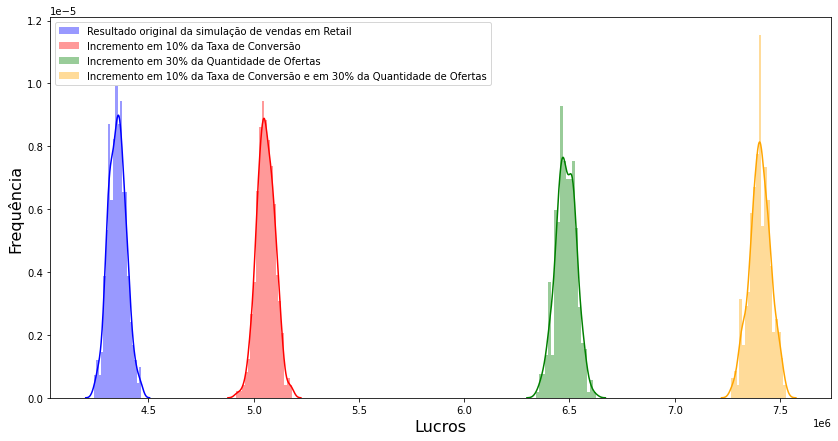

In [4]:
# Simulação de vendas Retail
# Número de empregados
employees = 12000
# Custo por empregado
wage = 230
# Número médio de ofertas por empregado
n = 30
# Incremento de 10% no número médio de ofertas por empregado
n_1 = 39
# Probabilidade de conversão por oferta
p = 0.07
# Incremento de 10% na probabilidade de conversão por oferta
p_1 = 0.077
# Receita por venda
revenue = 282
# Variáveis randômicas binomiais
conversions_up = np.random.binomial(n, p, size=employees)
# Simulação de 365 dias de operação
# Número de dias
sims = 365
sim_conversions_now = [np.sum(np.random.binomial(n, p, size=employees)) for i in range(sims)]
sim_conversions_up = [np.sum(np.random.binomial(n, p_1, size=employees)) for i in range(sims)]
sim_offers_up = [np.sum(np.random.binomial(n_1, p, size=employees)) for i in range(sims)]
sim_conversions_offers_up = [np.sum(np.random.binomial(n_1, p_1, size=employees)) for i in range(sims)]
sim_profits_now = np.array(sim_conversions_now)*revenue - employees*wage
sim_profits_conversions_up = np.array(sim_conversions_up)*revenue - employees*wage
sim_profits_offers_up = np.array(sim_offers_up)*revenue - employees*wage
sim_profits_conversions_offers_up = np.array(sim_conversions_offers_up)*revenue - employees*wage

# Plota e salva os resultados como um histograma
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(sim_profits_now, bins=20, label='Resultado original da simulação de vendas em Retail', color = 'blue')
ax = sns.distplot(sim_profits_conversions_up, bins=20, label='Incremento em 10% da Taxa de Conversão', color='red')
ax = sns.distplot(sim_profits_offers_up, bins=20, label='Incremento em 30% da Quantidade de Ofertas', color='green')
ax = sns.distplot(sim_profits_conversions_offers_up, bins=20, label='Incremento em 10% da Taxa de Conversão e em 30% da Quantidade de Ofertas', color='orange')
ax.set_xlabel("Lucros",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16)
plt.legend()

#### Conclusão

De forma a orientar o investimento em busca de um melhor **ROI**, sugere-se a utilização dos recursos em **Melhoria operacional**, de forma a incrementar em 30% a quantidade de ofertas médias por funcionário, alavancando os lucros provenientes de vendas na organização de *Retail*.